# Importing Basic Dependencies

In [284]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [285]:
df = pd.read_csv('bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [286]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [287]:
df.shape

(13320, 9)

In [288]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [289]:
# removing area,availability,society,balcony columns.society,balcony columns having so many missing values.by seeing area_type,availability
#columns it does not look like add any value in price prediction

df.drop(columns = ['area_type','availability','society','balcony'],inplace=True)

In [290]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [291]:
# checking for duplicated rows

df.duplicated().sum()

882

In [292]:
# droping duplicated values

df.drop_duplicates(inplace=True)

In [293]:
df.shape

(12438, 5)

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12438 entries, 0 to 13318
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12437 non-null  object 
 1   size        12422 non-null  object 
 2   total_sqft  12438 non-null  object 
 3   bath        12366 non-null  float64
 4   price       12438 non-null  float64
dtypes: float64(2), object(3)
memory usage: 583.0+ KB


### handling NA values

In [295]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [296]:
catvars = df.select_dtypes(include=['object']).columns
numvars = df.select_dtypes(include = ['int32','int64','float32','float64']).columns

In [297]:
catvars

Index(['location', 'size', 'total_sqft'], dtype='object')

In [298]:
numvars

Index(['bath', 'price'], dtype='object')

In [299]:
def uniquevals(col):
    print(f'Details of the particular col {col} is : {df[col].unique()}')

def valuecounts(col):
    print(f'Valuecounts of the particular col {col} is : {df[col].value_counts()}')


for col in catvars:
    uniquevals(col)
    valuecounts(col)
    print("-"*75)

Details of the particular col location is : ['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout']
Valuecounts of the particular col location is : Whitefield                        507
Sarjapur  Road                    364
Electronic City                   273
Thanisandra                       224
Kanakpura Road                    223
                                 ... 
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Uvce Layout                         1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
---------------------------------------------------------------------------
Details of the particular col size is : ['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK

In [300]:
df.describe()

,bath,price
count,12366.000000,12438.000000
mean,2.719715,115.408159
std,1.369902,153.069125
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,74.000000
75%,3.000000,125.000000
max,40.000000,3600.000000


In [301]:
'''
so on observation we can see that if we remove "bedroom" or 'BHK' from size,i can
make it as an integer value then after
'''
df['size'] = df['size'].str.replace(r'\D','')

df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12438 entries, 0 to 13318
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12437 non-null  object 
 1   size        12422 non-null  object 
 2   total_sqft  12438 non-null  object 
 3   bath        12366 non-null  float64
 4   price       12438 non-null  float64
dtypes: float64(2), object(3)
memory usage: 583.0+ KB


In [303]:
df['size'] = df['size'].fillna(df['size'].mode()[0])

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12438 entries, 0 to 13318
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12437 non-null  object 
 1   size        12438 non-null  object 
 2   total_sqft  12438 non-null  object 
 3   bath        12366 non-null  float64
 4   price       12438 non-null  float64
dtypes: float64(2), object(3)
memory usage: 583.0+ KB


In [305]:
df.dropna(inplace=True)

In [306]:
df['size'] = df['size'].astype('int32')

In [307]:
df['bath'] = df['bath'].astype('int32')

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12365 entries, 0 to 13318
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12365 non-null  object 
 1   size        12365 non-null  int32  
 2   total_sqft  12365 non-null  object 
 3   bath        12365 non-null  int32  
 4   price       12365 non-null  float64
dtypes: float64(1), int32(2), object(2)
memory usage: 483.0+ KB


# Exploratory Data Analysis

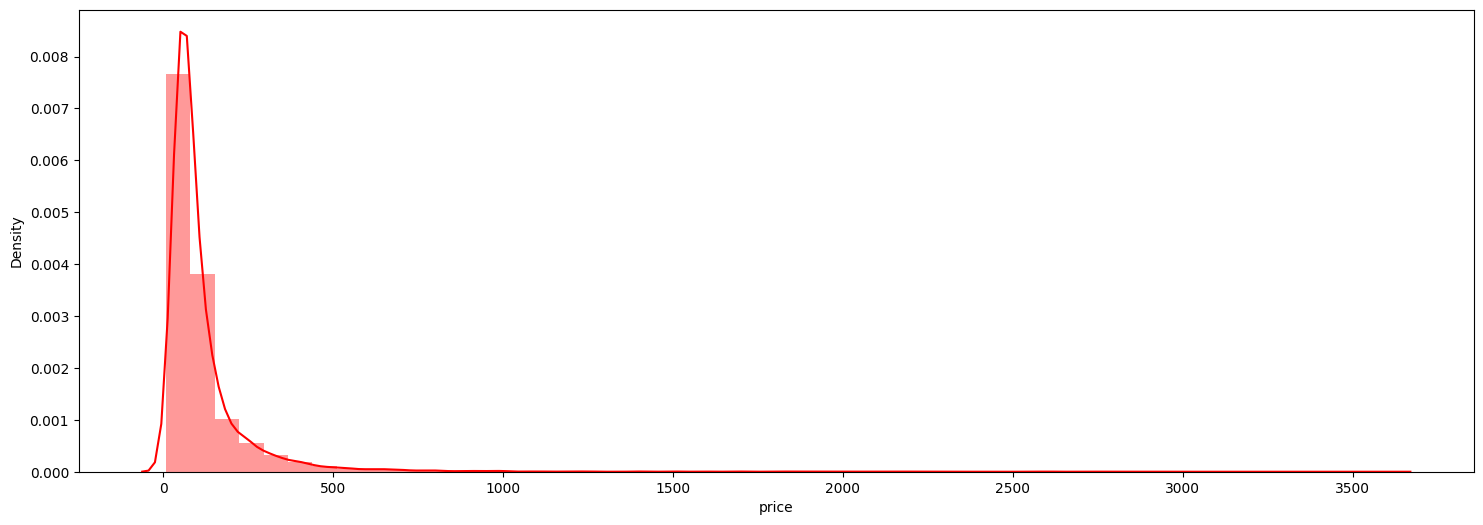

In [309]:
# viewing the distribution of the price column

plt1 = plt.figure(figsize = (18,6))
sn.distplot(df['price'],color='red')
plt.show()

From above it is clearly seen that output data is rightly skewed

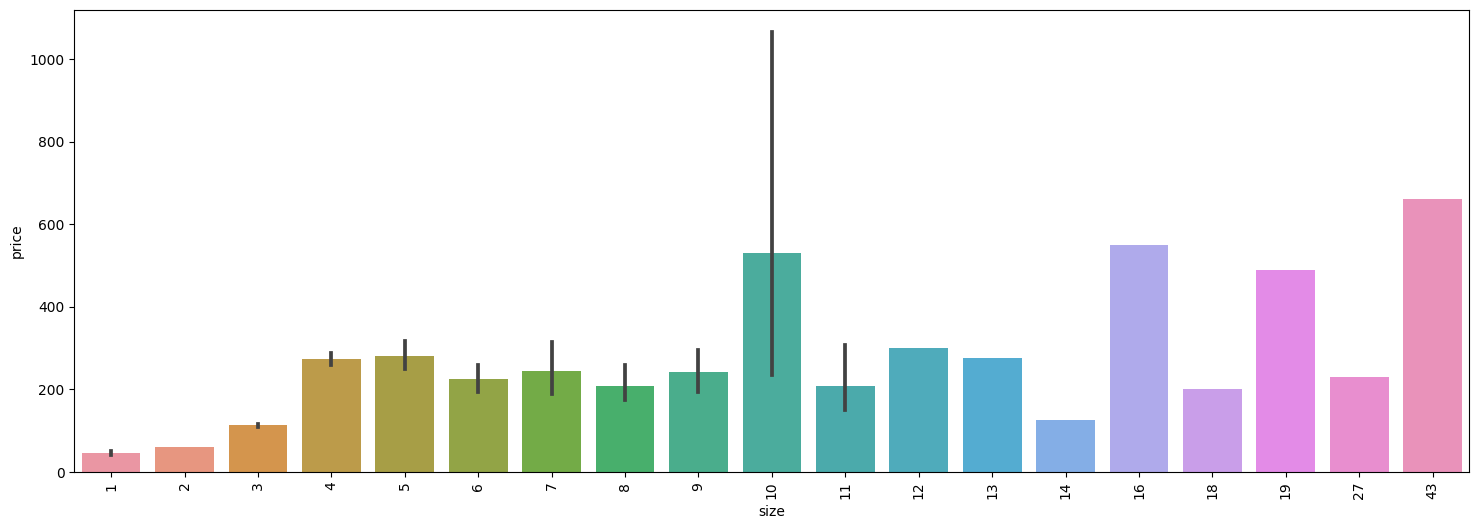

In [310]:
# average price for size

plt.figure(figsize=(18,6))
sn.barplot(x = df['size'],y = df['price'])
plt.xticks(rotation = 'vertical')
plt.show()

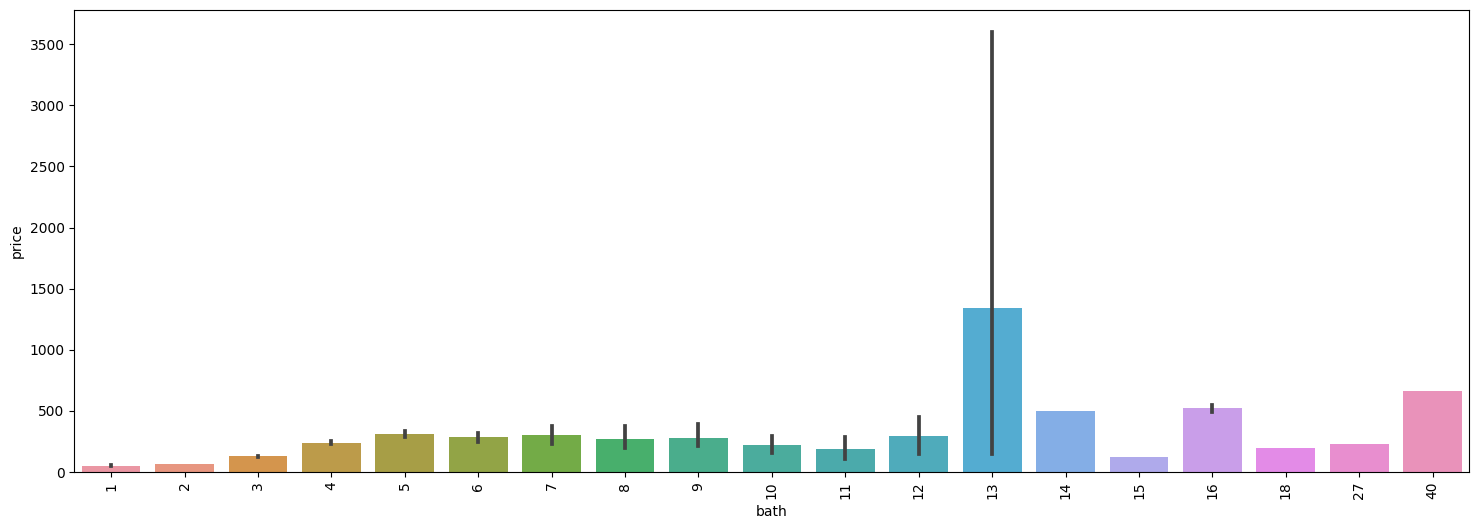

In [311]:
# average price for bath

plt.figure(figsize=(18,6))
sn.barplot(x = df['bath'],y = df['price'])
plt.xticks(rotation = 'vertical')
plt.show()

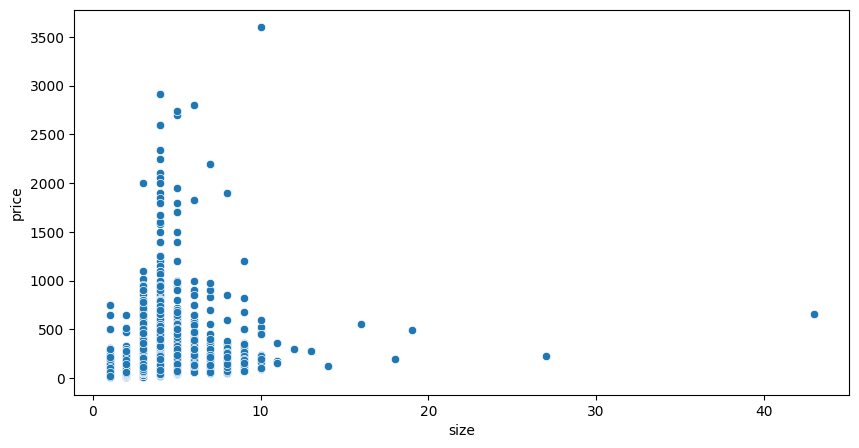

In [312]:
# variation of size towards the price
plt1 = plt.figure(figsize = (10,5))
sn.scatterplot(x = df['size'],y = df['price'])
plt.show()

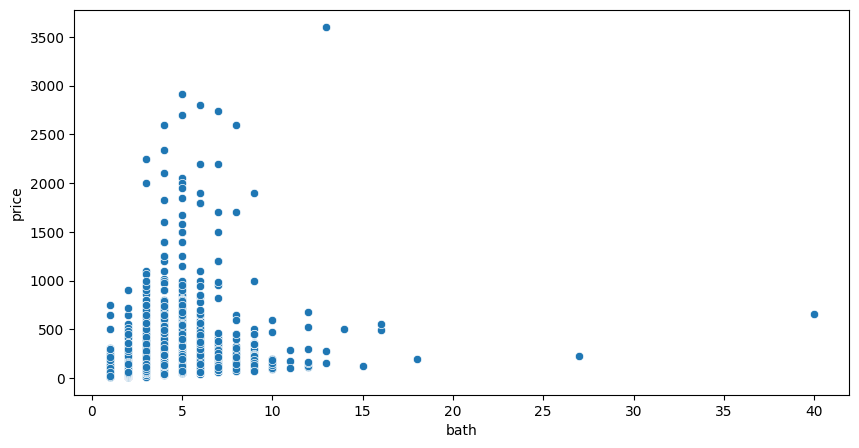

In [313]:
# variation of bath towards the price
plt1 = plt.figure(figsize = (10,5))
sn.scatterplot(x = df['bath'],y = df['price'])
plt.show()

In [314]:
df['total_sqft'].nunique()

2067

we will convert total_sqft into integer

In [315]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [316]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)

In [317]:
df['total_sqft'] = df['total_sqft'].astype('float32')

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12365 entries, 0 to 13318
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12365 non-null  object 
 1   size        12365 non-null  int32  
 2   total_sqft  12319 non-null  float32
 3   bath        12365 non-null  int32  
 4   price       12365 non-null  float64
dtypes: float32(1), float64(1), int32(2), object(1)
memory usage: 434.7+ KB


In [319]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2,39.07
1,Chikka Tirupathi,4,2600.0,5,120.00
2,Uttarahalli,3,1440.0,2,62.00
3,Lingadheeranahalli,3,1521.0,3,95.00
4,Kothanur,2,1200.0,2,51.00


Any location having less than 10 data points will be tagged as "other" location. This way number of categories can be reduced by huge amount. It will help us with having fewer dummy columns

In [320]:
df['location'].value_counts(ascending=False)

Whitefield               501
Sarjapur  Road           357
Electronic City          273
Thanisandra              223
Kanakpura Road           217
                        ... 
Maruthi Extension          1
Okalipura                  1
Old Town                   1
Vasantapura main road      1
Abshot Layout              1
Name: location, Length: 1304, dtype: int64

In [321]:
df['location'].nunique()

1304

In [322]:
df['location'] = df['location'].apply(lambda x: x.strip())
location_stats = df['location'].value_counts(ascending=False)
location_stats

Whitefield                502
Sarjapur  Road            357
Electronic City           275
Thanisandra               225
Kanakpura Road            217
                         ... 
1Channasandra               1
Ring Road Nagarbhavi        1
Mango Garden Layout         1
Vijayabank bank layout      1
Abshot Layout               1
Name: location, Length: 1293, dtype: int64

In [323]:
len(location_stats[location_stats>10])

231

In [324]:
len(location_stats)

1293

In [325]:
location_stats_less_than_10 = location_stats[location_stats<=10]

In [326]:
location_stats_less_than_10

BEML Layout               10
Poorna Pragna Layout      10
BTM 1st Stage             10
Nagappa Reddy Layout      10
Dairy Circle              10
                          ..
1Channasandra              1
Ring Road Nagarbhavi       1
Mango Garden Layout        1
Vijayabank bank layout     1
Abshot Layout              1
Name: location, Length: 1062, dtype: int64

In [327]:
df['location'] = df['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df['location'].unique())

232

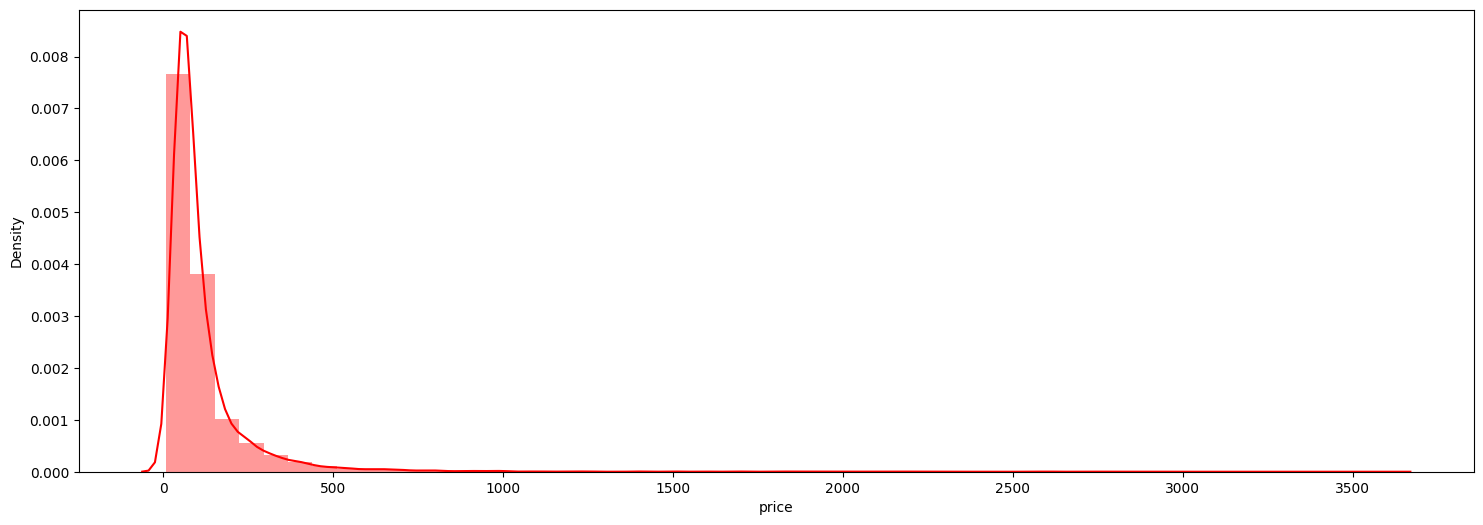

In [328]:
# viewing the distribution of the price column

plt1 = plt.figure(figsize = (18,6))
sn.distplot(df['price'],color='red')
plt.show()

### boxplot to see outliers

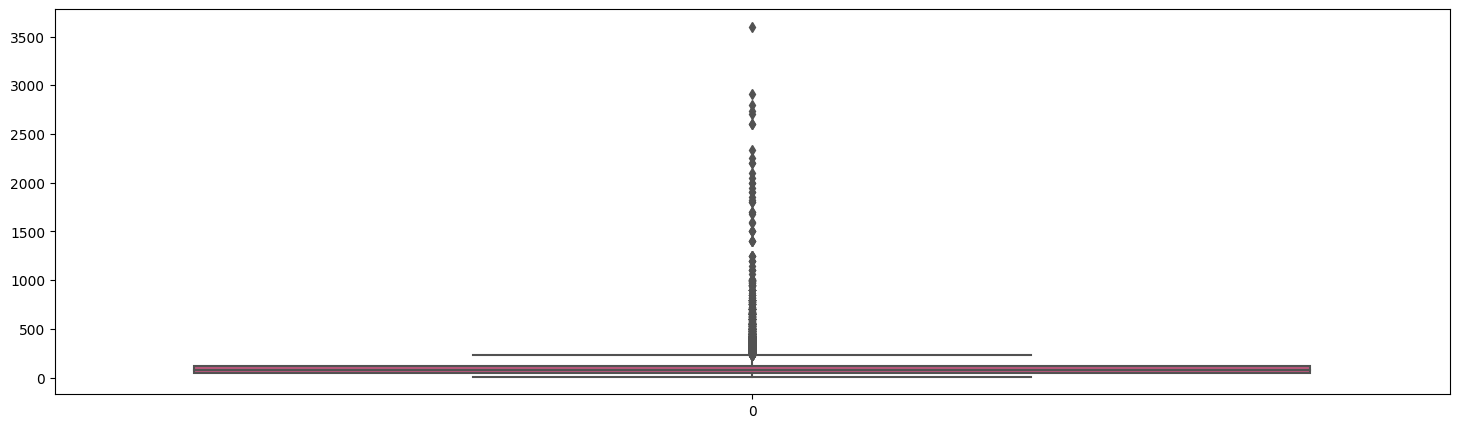

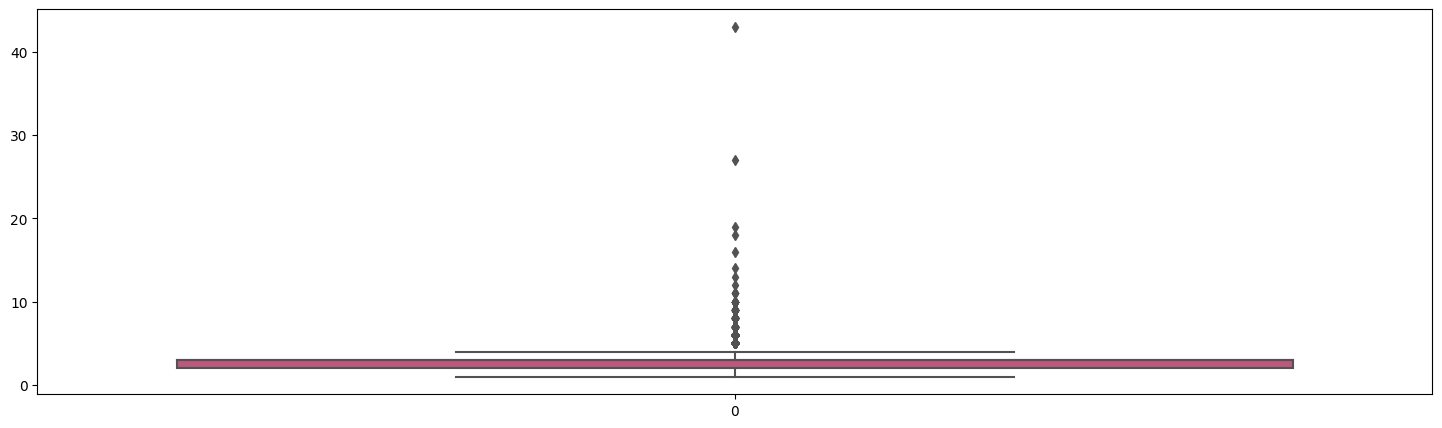

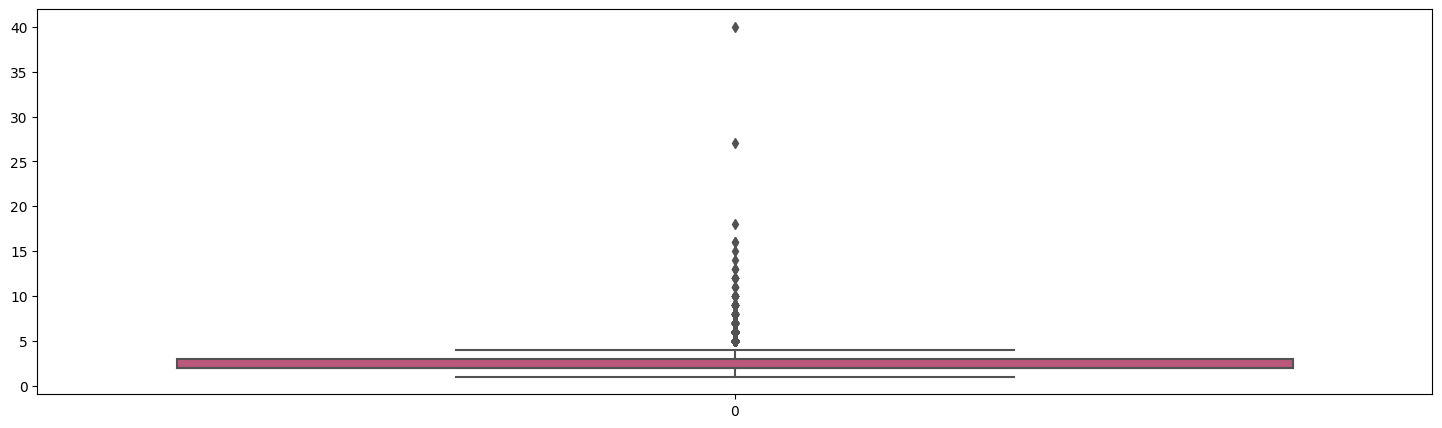

In [329]:
def drawplot(col):
    plt.figure(figsize=(18,5))
    sn.boxplot(df[col],palette='plasma')

toview = ['price','size','bath']
for col in toview:
    drawplot(col)

first we will remove outliers from size and bath column using Interquartile range(IQR).then we will look for price column

In [330]:
def remove_outlier(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_band = q1 - (1.5*iqr)
    upper_band = q3 + (1.5*iqr)
    df = df[(df[col]>lower_band) & (df[col]<upper_band)]
    return df

In [331]:
df = remove_outlier(df,'size')

In [332]:
df.shape

(11532, 5)

In [333]:
df = remove_outlier(df,'bath')

In [334]:
df.shape

(11150, 5)

In [335]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2,39.07
2,Uttarahalli,3,1440.0,2,62.00
3,Lingadheeranahalli,3,1521.0,3,95.00
4,Kothanur,2,1200.0,2,51.00
5,Whitefield,2,1170.0,2,38.00


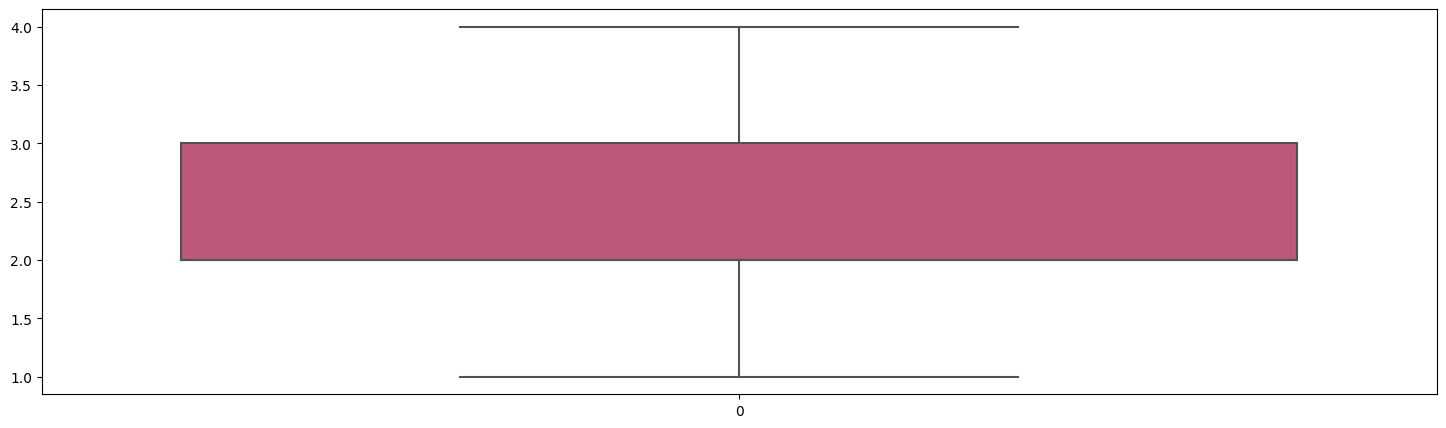

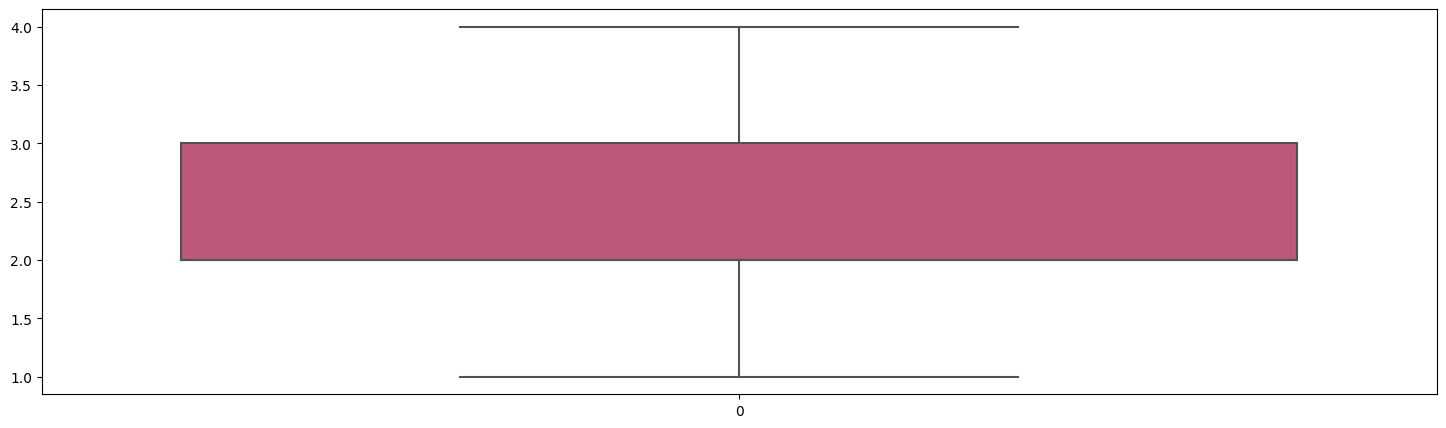

In [336]:
def drawplot(col):
    plt.figure(figsize=(18,5))
    sn.boxplot(df[col],palette='plasma')

toview = ['size','bath']
for col in toview:
    drawplot(col)

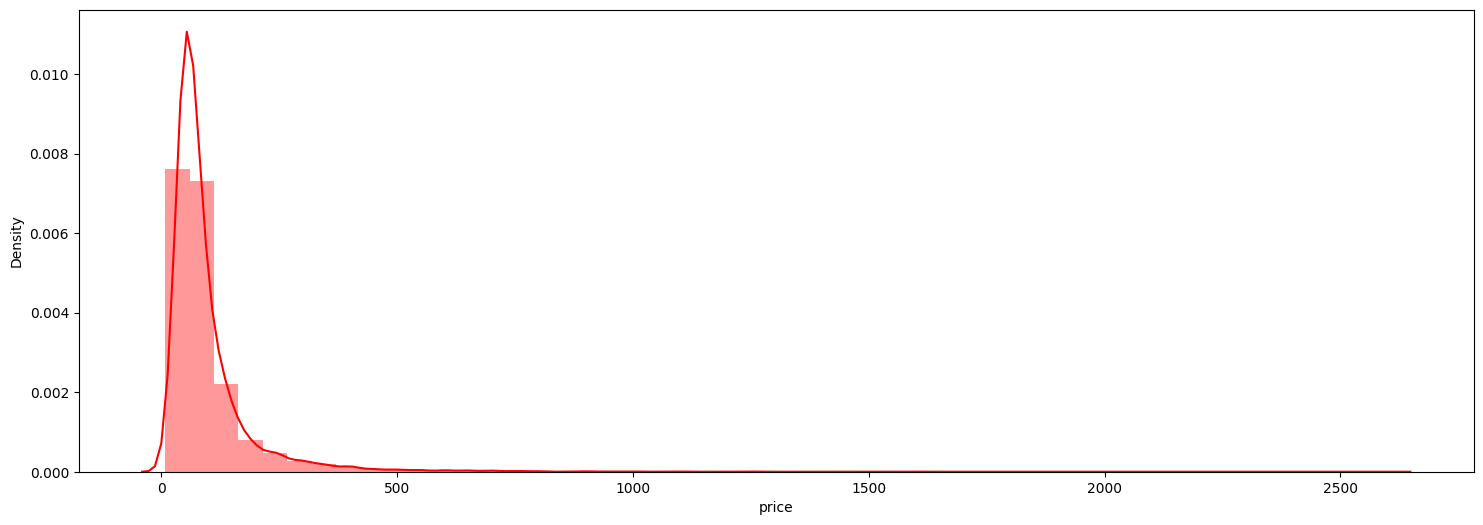

In [337]:
# viewing the distribution of the price column

plt1 = plt.figure(figsize = (18,6))
sn.distplot(df['price'],color='red')
plt.show()

In [338]:
df = remove_outlier(df,'price')

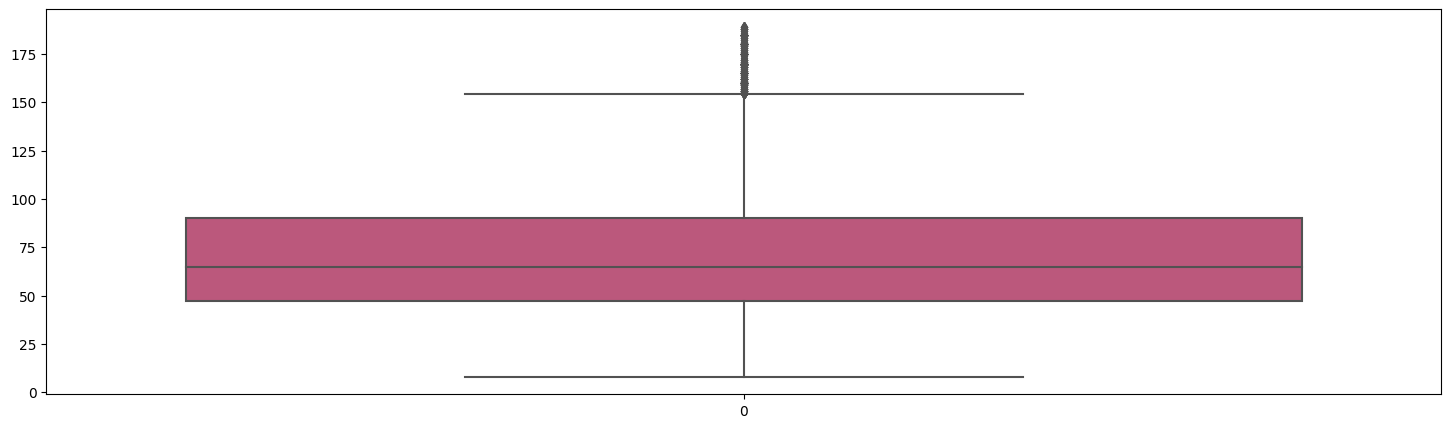

In [339]:
plt.figure(figsize=(18,5))
sn.boxplot(df['price'],palette='plasma')
plt.show()

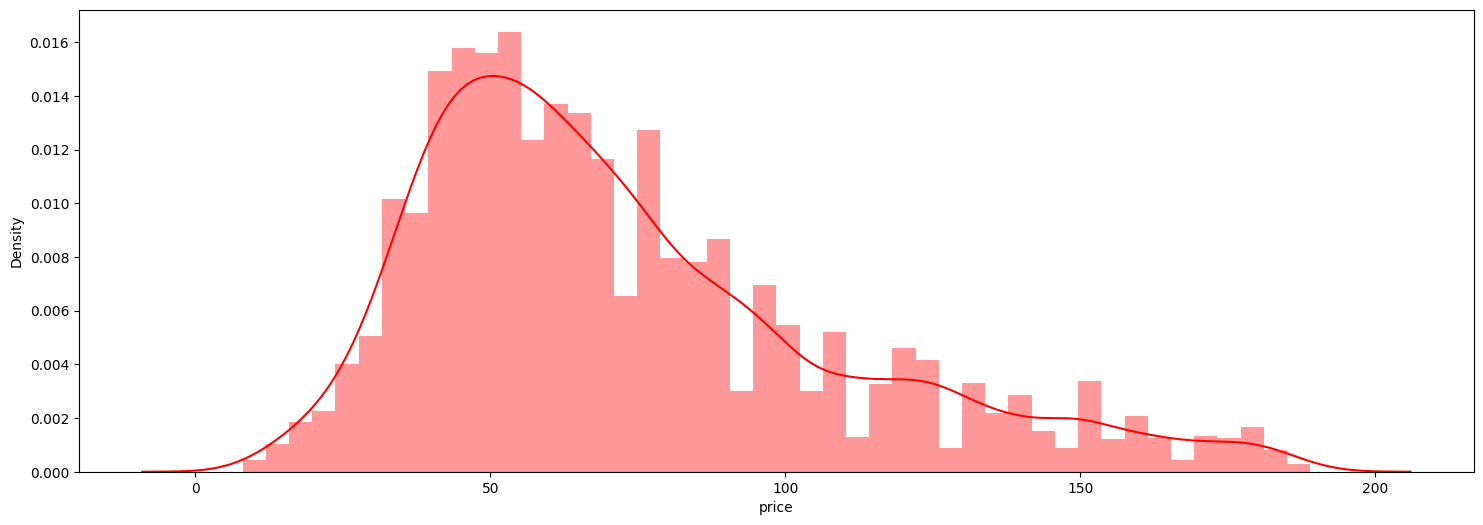

In [340]:
plt1 = plt.figure(figsize = (18,6))
sn.distplot(df['price'],color='red')
plt.show()

In [341]:
df.shape

(10173, 5)

In [342]:
df.corr()

,size,total_sqft,bath,price
size,1.000000,0.328299,0.793727,0.553443
total_sqft,0.328299,1.000000,0.325862,0.376016
bath,0.793727,0.325862,1.000000,0.600913
price,0.553443,0.376016,0.600913,1.000000


Now we will see corelation between columns

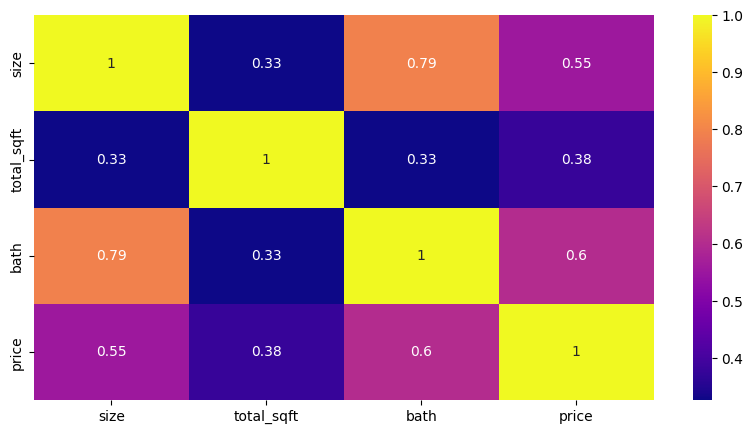

In [343]:
plt.figure(figsize=(10,5))
sn.heatmap(df.corr(),annot=True,cmap='plasma')
plt.show()

In [344]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price') ):#only num cols except for the price column
        col_list.append(col)

In [345]:
col_list

['size', 'total_sqft', 'bath']

In [346]:
X = df[col_list]
X

,size,total_sqft,bath
0,2,1056.0,2
2,3,1440.0,2
3,3,1521.0,3
4,2,1200.0,2
5,2,1170.0,2
...,...,...,...
13309,3,1675.0,3
13310,2,1050.0,2
13312,2,1262.0,2
13314,3,1715.0,3


In [347]:
for i in range(len(X.columns)):
    print(i)

0
1
2


In [348]:
df.isna().sum()

location       0
size           0
total_sqft    30
bath           0
price          0
dtype: int64

In [349]:
df.dropna(inplace=True)

In [350]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price') ):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

      feature        VIF
0        size  32.857358
1  total_sqft   3.978759
2        bath  32.591579


Since,size and bath are highly correlated with each other,it will impact model performance due to multicollinearity.
so,its better to remove one of the column to avoid further issues.since size of the room is important while taking home.we will remove bath

In [351]:
df.drop(columns='bath',inplace=True)

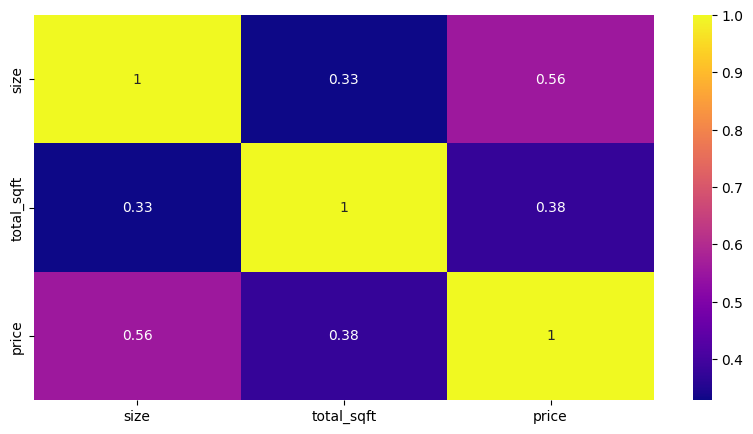

In [352]:
plt.figure(figsize=(10,5))
sn.heatmap(df.corr(),annot=True,cmap='plasma')
plt.show()

In [353]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price') ):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

      feature       VIF
0        size  3.902636
1  total_sqft  3.902636


In [354]:
df.head()

,location,size,total_sqft,price
0,Electronic City Phase II,2,1056.0,39.07
2,Uttarahalli,3,1440.0,62.00
3,Lingadheeranahalli,3,1521.0,95.00
4,Kothanur,2,1200.0,51.00
5,Whitefield,2,1170.0,38.00


In [355]:
df.to_csv('Banglore_house_price_predicted.csv')

# Model buliding

In [356]:
test = df['price']
train = df.drop(['price'],axis = 1)

In [357]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree

In [358]:
X_train, X_test, y_train, y_test = train_test_split(train,test,
                                                   test_size=0.15,random_state=2)

X_train.shape,X_test.shape

((8621, 3), (1522, 3))

There's a Class which we imported named as Column Trasnformer we use this widely while building our models using Pipelines,so for this we have to get the index numbers of the columns which are having categorical variables

In [359]:
mapper = {i:value for i,value in enumerate(X_train.columns)}
mapper

{0: 'location', 1: 'size', 2: 'total_sqft'}

### Linear Regression

In [360]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf1',OneHotEncoder(sparse=False,drop='first'),[0]),
    ('col_tnf2',MinMaxScaler(feature_range=(0, 1)),[1,2])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.44595274452591116
MAE 18.641642802894722


### Ridge Regression

In [361]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0]),
    ('col_tnf2',MinMaxScaler(feature_range=(0, 1)),[1,2])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.44331980543479665
MAE 19.237882597935716


### Lasso regression

In [362]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0]),
    ('col_tnf2',MinMaxScaler(feature_range=(0, 1)),[1,2])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.44974299376281646
MAE 18.58071527150165


### Decision Tree

In [363]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0]),
    ('col_tnf2',MinMaxScaler(feature_range=(0, 1)),[1,2])
],remainder='passthrough')

step2 = DecisionTreeRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.4907448397234816
MAE 16.404075139000923


### Random Forest

In [364]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0]),
    ('col_tnf2',MinMaxScaler(feature_range=(0, 1)),[1,2])
],remainder='passthrough')

step2 = RandomForestRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.6033882628115532
MAE 14.734065415067688


In [365]:
import pickle
file = open('pipe.pkl','wb')
pickle.dump(pipe,file)
file.close()

### Adaboost

In [366]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0]),
    ('col_tnf2',MinMaxScaler(feature_range=(0, 1)),[1,2])
],remainder='passthrough')

step2 = AdaBoostRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.48269911799405596
MAE 20.21822254679695


### Gradient boost

In [367]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0]),
    ('col_tnf2',MinMaxScaler(feature_range=(0, 1)),[1,2])
],remainder='passthrough')

step2 = GradientBoostingRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.612040368865888
MAE 15.882350392964668


### XgbRegressor

In [368]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0]),
    ('col_tnf2',MinMaxScaler(feature_range=(0, 1)),[1,2])
],remainder='passthrough')

step2 = XGBRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.6415737739540558
MAE 14.581753863110338


### SVM

In [369]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0]),
    ('col_tnf2',MinMaxScaler(feature_range=(0, 1)),[1,2])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score -0.8667780508940783
MAE 17.258792887503702


### Hyperparameter Tuning

In [370]:
indexlist = [0]
transformlist = []
for key,value in mapper.items():
    if key in indexlist:
        transformlist.append(value)

transformlist

['location']

In [371]:
train_new = pd.get_dummies(train,columns=transformlist,drop_first=True)
train_new.head()

,size,total_sqft,location_1st Phase JP Nagar,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,location_8th Phase JP Nagar,location_9th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,2,1056.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1440.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1521.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1200.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,1170.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [372]:
X_train, X_test, y_train, y_test = train_test_split(train_new,test,
                                                   test_size=0.15,random_state=2)

X_train.shape,X_test.shape

((8621, 232), (1522, 232))

### Random Forest

In [373]:
params=  {

    'RandomForest':{
        'model' : RandomForestRegressor(),
        'params':{
            'n_estimators':[100,150,200,250],
            #'criterion':["mse", "mae"],
            'max_depth':[2,4,8,10],
        }
    }
}

In [374]:
scores = []
for modelname,mp in params.items():
    clf = GridSearchCV(mp['model'],param_grid=mp['params'],verbose=2)
    clf.fit(X_train,y_train)
    scores.append({
        'model_name':modelname,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_,
    })

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ......................max_depth=2, n_estimators=100; total time=   1.6s
[CV] END ......................max_depth=2, n_estimators=100; total time=   1.7s
[CV] END ......................max_depth=2, n_estimators=100; total time=   1.0s
[CV] END ......................max_depth=2, n_estimators=100; total time=   1.0s
[CV] END ......................max_depth=2, n_estimators=100; total time=   1.1s
[CV] END ......................max_depth=2, n_estimators=150; total time=   1.6s
[CV] END ......................max_depth=2, n_estimators=150; total time=   1.5s
[CV] END ......................max_depth=2, n_estimators=150; total time=   1.5s
[CV] END ......................max_depth=2, n_estimators=150; total time=   1.5s
[CV] END ......................max_depth=2, n_estimators=150; total time=   2.2s
[CV] END ......................max_depth=2, n_estimators=200; total time=   2.4s
[CV] END ......................max_depth=2, n_es

scores

### XGBRegressor

In [375]:
params=  {

    'Xg boost':{
        'model':XGBRegressor(),
        'params':{
            'n_estimators':[100,150,200,250],
            #'max_depth':[3,8,10],
            #'learning_rate':[0.1, 1.0],
            #'reg_alpha':[0.25,0.5,0.75,1.0],
            #'reg_lambda':[0.25,0.5,0.75,1.0],
        }
    }
}

In [376]:
scores = []
for modelname,mp in params.items():
    clf = GridSearchCV(mp['model'],param_grid=mp['params'],verbose=2)
    clf.fit(X_train,y_train)
    scores.append({
        'model_name':modelname,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_,
    })

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ...................................n_estimators=100; total time=   6.4s
[CV] END ...................................n_estimators=100; total time=   9.8s
[CV] END ...................................n_estimators=100; total time=   8.0s
[CV] END ...................................n_estimators=100; total time=   6.3s
[CV] END ...................................n_estimators=100; total time=   8.0s
[CV] END ...................................n_estimators=150; total time=  11.1s
[CV] END ...................................n_estimators=150; total time=  11.0s
[CV] END ...................................n_estimators=150; total time=   9.3s
[CV] END ...................................n_estimators=150; total time=  11.1s
[CV] END ...................................n_estimators=150; total time=  11.0s
[CV] END ...................................n_estimators=200; total time=  14.2s
[CV] END ...................................n_est

In [377]:
scores

[{'model_name': 'Xg boost',
  'best_score': 0.6448041379066936,
  'best_estimator': XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=200, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...)}]

In [378]:
temp_df = pd.DataFrame(clf.cv_results_)

In [379]:
temp_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.673724,1.301470,0.018240,0.000327,100,{'n_estimators': 100},0.645033,0.646061,0.653979,0.655862,0.618606,0.643908,0.013345,3
1,10.690104,0.692796,0.020366,0.000696,150,{'n_estimators': 150},0.643392,0.644313,0.653111,0.660991,0.620346,0.644430,0.013644,2
2,14.455868,0.694872,0.027595,0.006581,200,{'n_estimators': 200},0.643928,0.645017,0.648748,0.662159,0.624168,0.644804,0.012194,1
3,18.555105,1.189795,0.029719,0.009949,250,{'n_estimators': 250},0.640111,0.642958,0.645933,0.661862,0.624121,0.642997,0.012076,4


In [380]:
temp_df [temp_df['rank_test_score'] ==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,14.455868,0.694872,0.027595,0.006581,200,{'n_estimators': 200},0.643928,0.645017,0.648748,0.662159,0.624168,0.644804,0.012194,1


In [381]:
rf = RandomForestRegressor(max_depth=10, n_estimators=250)

rf.fit(X_train,y_train)
ypred = rf.predict(X_test)
print(metrics.r2_score(y_test,ypred))

0.6035149295743019


### Prediction on the whole Dataset

In [382]:
predicted = []
testtrain = np.array(train_new)
for i in range(len(testtrain)):
    predicted.append(rf.predict([testtrain[i]]))

predicted

[array([47.85782962]),
 array([68.49077801]),
 array([81.8090361]),
 array([66.38904795]),
 array([55.04197454]),
 array([66.8201217]),
 array([107.77707851]),
 array([48.51469226]),
 array([51.32230391]),
 array([145.33183144]),
 array([55.18868496]),
 array([51.73548848]),
 array([73.37485888]),
 array([51.40899033]),
 array([36.92020065]),
 array([109.85794594]),
 array([108.10226904]),
 array([24.44565392]),
 array([65.72319894]),
 array([36.04664442]),
 array([89.32687987]),
 array([54.72967314]),
 array([52.07223727]),
 array([143.10846876]),
 array([46.35824259]),
 array([110.97233436]),
 array([103.70677075]),
 array([119.46111479]),
 array([37.3562554]),
 array([48.50275063]),
 array([109.07336948]),
 array([66.66497292]),
 array([54.10198025]),
 array([71.233887]),
 array([65.56238009]),
 array([40.41636998]),
 array([36.8013054]),
 array([74.95772319]),
 array([47.5367175]),
 array([80.8486896]),
 array([46.42323925]),
 array([44.02778053]),
 array([68.56947761]),
 array([98

In [383]:
df['Predicted Price'] = np.array(predicted)
df

,location,size,total_sqft,price,Predicted Price
0,Electronic City Phase II,2,1056.0,39.07,47.857830
2,Uttarahalli,3,1440.0,62.00,68.490778
3,Lingadheeranahalli,3,1521.0,95.00,81.809036
4,Kothanur,2,1200.0,51.00,66.389048
5,Whitefield,2,1170.0,38.00,55.041975
...,...,...,...,...,...
13309,Yeshwanthpur,3,1675.0,92.13,98.230096
13310,Rachenahalli,2,1050.0,52.71,48.529029
13312,Bellandur,2,1262.0,47.00,66.739922
13314,Green Glen Layout,3,1715.0,112.00,106.416404


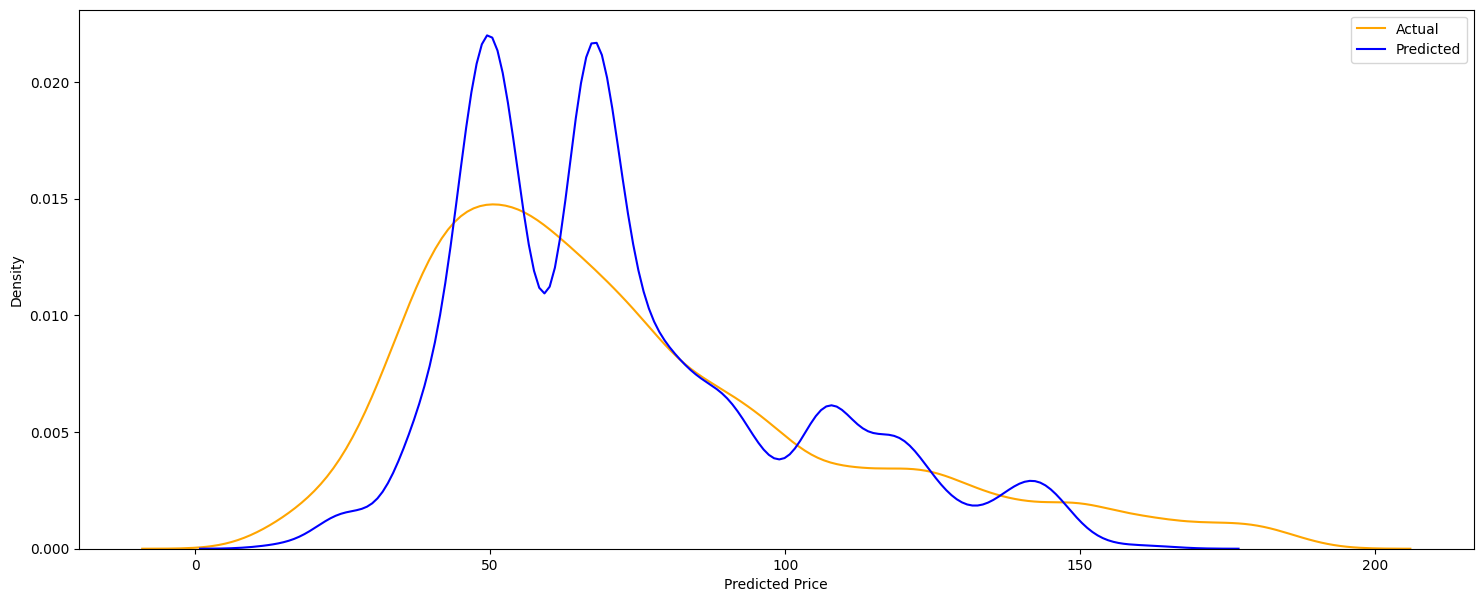

In [384]:
plt1 = plt.figure(figsize = (18,7))
sn.distplot(df['price'],hist=False,color='orange',label='Actual')
sn.distplot(df['Predicted Price'],hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()